In [69]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

### 1 Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data_df = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d",
                                 "price_change_percentage_14d", "price_change_percentage_30d",
                                 "price_change_percentage_60d", "price_change_percentage_200d",
                                 "price_change_percentage_1y"]])

scaled_market_data_df[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [6]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_market_data_df,
                                     columns=["price_change_percentage_24h", "price_change_percentage_7d",
                                 "price_change_percentage_14d", "price_change_percentage_30d",
                                 "price_change_percentage_60d", "price_change_percentage_200d",
                                 "price_change_percentage_1y"])

# Copy the crypto names from the original data
scaled_market_data_df.index = market_data_df.index

# Set the coinid column as index

# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### 2. Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k= list(range(1,11))

# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame 
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters= i, n_init="auto", random_state=1)
    model.fit (scaled_market_data_df)
    inertia.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df

c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:14

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: xlabel='k'>

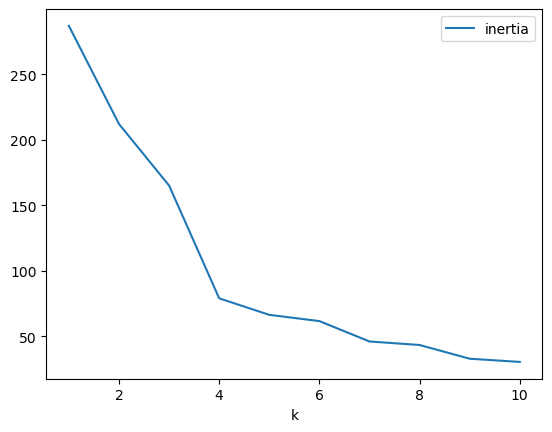

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_data_df.plot.line(
    x="k",
    y="inertia")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer: 4

### 3. Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, n_init="auto", random_state=1)


In [11]:
# Fit the K-Means model using the scaled data
k_model.fit(scaled_market_data_df)

c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = k_model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
scaled_market_data_df2 = scaled_market_data_df.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_df2["crypto_cluster"] = k_4

# Display sample data
scaled_market_data_df2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

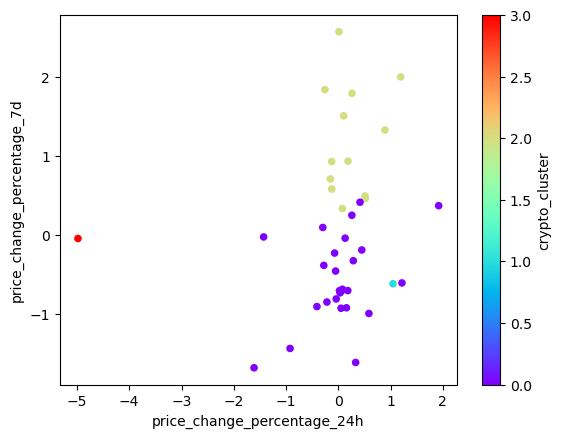

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scaled_market_data_df2.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap= "rainbow"
)


### 4. Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [39]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca_stocks = pca.fit_transform(scaled_market_data_df)

# View the first five rows of the DataFrame. 
scaled_market_data_df2[0:5]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [40]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:  0.89503166

In [45]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data

pca_df = pd.DataFrame(pca_stocks, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data

pca_df.index = scaled_market_data_df2.index

# Set the coinid column as index
#pca_df['coin_id'] = scaled_market_data_df.index


# Display sample data
pca_df[0:5]

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### 5. Find the Best Value for k Using the PCA Data

In [49]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model2 = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model2.fit(pca_df)
    inertia.append(model2.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data2 = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data2_df = pd.DataFrame(elbow_data2)

# Display the DataFrame
elbow_data2_df

c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:14

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: xlabel='k'>

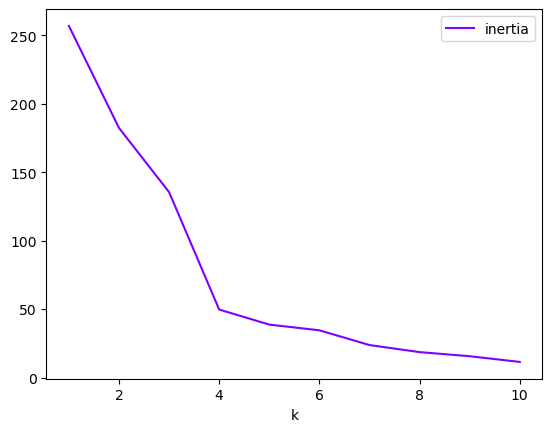

In [52]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_data2_df.plot.line(
    x="k",
    y="inertia",
    colormap="rainbow"
)


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No

### 6. Cluster Cryptocurrencies with K-means Using the PCA Data

In [54]:
# Initialize the K-Means model using the best value for k
model_k = KMeans(n_clusters=4, n_init="auto", random_state=1)

In [55]:
# Fit the K-Means model using the PCA data
model_k.fit(pca_df)

c:\Users\Daniel Quinn\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [56]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_prediction = model_k.predict(pca_df)

# Print the resulting array of cluster values.
clusters_prediction

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [58]:
# Create a copy of the DataFrame with the PCA data
pca_df2 = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df2["predicted_clusters"] = clusters_prediction

# Display sample data
pca_df2[0:5]

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [68]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 


pca_df2.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    colormap = "rainbow"
)


:Scatter   [PCA1]   (PCA2)

### 7. Determine the Weights of Each Feature on each Principal Component

In [78]:
# Use the columns from the original scaled DataFrame as the index.

pca_df2.sort_values("PCA1", ascending=False).head()

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
ethlend,8.089018,-3.896891,2.301382,3
celsius-degree-token,4.792395,6.767679,-1.986985,1
theta-token,2.676868,-0.013954,-1.965207,0
havven,0.865762,-2.261882,0.275583,0
nem,0.608974,0.563532,-1.148742,0


In [81]:
pca_df2.sort_values("PCA2", ascending=True).head()

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
ethlend,8.089018,-3.896891,2.301382,3
havven,0.865762,-2.261882,0.275583,0
ontology,-0.632355,-2.108117,-0.652227,0
vechain,-0.556315,-1.938209,-1.261776,0
crypto-com-chain,-0.248198,-1.376252,-1.462026,0


In [83]:
pca_df2.sort_values("PCA3", ascending=False).head()

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
chainlink,-0.450711,0.517699,2.846143,2
ethlend,8.089018,-3.896891,2.301382,3
bitcoin-cash,-1.157800,2.041209,1.859715,2
cosmos,-0.306272,0.703415,1.714224,2
monero,0.060499,2.909404,1.498571,2


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:
-  "ethlend", "celsius-degree-token", and "theta-token" have the strongest positive influence on PCA1.

-"ethlend", "havven", and "ontology" have the strongest negative influence on PCA2.

- "chainlink", "ethlend", "bitcoin-cash", and "cosmon" have the strongest positive influence on PCA3. 

    